In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror{font-family:Consolas; font-size:15pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output{font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:15pt;}
div.prompt{min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_renderulli{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch10.  N차원 배열 (Numpy 배열) 다루기 </font></b>

# 4. 복사와 뷰

## 4.1 할당

In [15]:
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [16]:
b = a

In [17]:
a.shape, a.ndim, id(a), type(a)

((12,), 1, 3116361237968, numpy.ndarray)

In [18]:
b.shape, b.ndim, id(b), type(b)

((12,), 1, 3116361237968, numpy.ndarray)

In [19]:
a == b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [20]:
np.all(a==b)

True

In [21]:
b.shape = (3,4) #할당 받은 b의 shape 수정

In [22]:
a.shape, a.ndim, id(a), type(a)

((3, 4), 2, 3116361237968, numpy.ndarray)

In [23]:
b.shape, b.ndim, id(b), type(b)

((3, 4), 2, 3116361237968, numpy.ndarray)

## 4.2 얕은복사 : 뷰(view)

In [25]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
a.reshape(2,6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [29]:
c=a.view()
print(id(a),id(c))

3116391764336 3116365708336


In [30]:
c==a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [32]:
c.shape=(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [33]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [37]:
c[1, ::2]=[9,9,9]
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 9,  7,  9,  9,  9, 11]])

In [38]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  9,  7],
       [ 9,  9,  9, 11]])

## 4.3 깊은복사

In [50]:
a = np.array ([[5, 4,15,1],
              [99,6,16,1],
              [20,5,14,0]])
a

array([[ 5,  4, 15,  1],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

In [56]:
X = a[:,:-1] # 슬라이싱 될 때는 뷰가 반환 (얕은 복사)
X

array([[ 5,  4, 15],
       [99,  6, 16],
       [20,  5, 14]])

In [57]:
X[:, 0] = -9
X

array([[-9,  4, 15],
       [-9,  6, 16],
       [-9,  5, 14]])

In [58]:
X = a[:,:-1].copy() # 깊은 복사
#X =np.array(a[:,:-1],copy=True) # 깊은복사 방법2
X

array([[-9,  4, 15],
       [-9,  6, 16],
       [-9,  5, 14]])

# 5. 고급인덱싱

## 5.1 인덱스 배열로 인덱싱

In [4]:
import numpy as np
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [6]:
a[[0,5,9]]

array([ 0, 25, 81])

In [7]:
#인덱싱 하기 위한 값을 배열로 만듦
i = np.array([0,1,1,9])
a[i] #결과는 i(인덱싱 배열)의 형태로 따라감

array([ 0,  1,  1, 81])

In [8]:
i = np.array([[0,1],
             [1,9]])

a[i]

array([[ 0,  1],
       [ 1, 81]])

In [9]:
a[i] = 10
a

array([ 10,  10,   4,   9,  16,  25,  36,  49,  64,  10, 100, 121])

In [10]:
a[i] += 10 #1번 인덱스는 1번만 10 증가

In [14]:
# 색상                 R G B
palette = np.array ([[0,0,0], #black
                     [255,0,0], #red
                     [0,255,0], #green
                     [0,0,255], #blue
                     [255,255,255], # white
                     ])

In [21]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]
image_data.shape

(10, 10, 3)

In [22]:
from matplotlib import pyplot as plt

In [23]:
import matplotlib.pyplot as plt

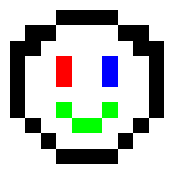

In [34]:
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.axis('off')
plt.show()

## 5.2 논리배열을 이용한 인덱싱

In [31]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [32]:
a%2 == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [33]:
a[a%2==0]# 논리배열을 이용한 인덱싱 시 True인 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [35]:
a[a>15]

array([16, 17, 18, 19])

# 6. 선형대수
 - 2차원 넘파이 배열을 행렬 
   * 행렬곱 : @
   * 단위행렬 : np.eye(n) : n행 n열 단위행렬
   * 전치행렬 : X.T , X.transpose()
   * 역행렬 : np.linalg.inv(X)

In [37]:
a = np.array([[1,2],
             [3,4]])

a

array([[1, 2],
       [3, 4]])

In [38]:
#a의 역행렬 : a의 역행렬 @ a ==> 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [40]:
np.linalg.inv(a)@a

array([[ 1.00000000e+00,  4.44089210e-16],
       [-5.55111512e-17,  1.00000000e+00]])

In [45]:
#정방행렬이 아니면 역행렬 구할 수 없음
a = np.array([[1,2,1],
              [3,4,1]])

#np.linalg.inv(a) --> 에러남
a.T @ a

array([[10, 14,  4],
       [14, 20,  6],
       [ 4,  6,  2]])

In [46]:
# 전치행렬을 곱하면 정방행렬로
a@a.T

array([[ 6, 12],
       [12, 26]])

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## 6.1 선형 연립방정식 풀기 (단변량 회귀분석): 독립변수1, 데이터 2

In [10]:
import numpy as np
x = np.array([2,4]) #공부량 : 독립변수
y = np.array([40,60])#점수 : 종속변수 (타겟 변수)

X = np.c_[x, np.ones(len(x))]
Y = y.reshape(-1,1)
X,Y

(array([[2., 1.],
        [4., 1.]]),
 array([[40],
        [60]]))

In [11]:
X = np.column_stack( (x, np.ones(len(x) ) ) )
X

array([[2., 1.],
       [4., 1.]])

In [12]:
X = np.dstack( (x, np.ones(len(x)))).reshape(-1,2) #dstack은 3차원이라서 2차원으로 변경
X

array([[2., 1.],
       [4., 1.]])

In [13]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행력 @ Y
# wb = X의 역행렬 @ Y

wb = np.linalg.inv(X) @ Y
wb

array([[10.],
       [20.]])

In [14]:
x_ = np.linspace(0, 10, 100) #0부터 10까지 100개의 데이터
h = wb[0]*x_ + wb[1]
h = np.add(np.multiply(wb[0], x_), wb[1])

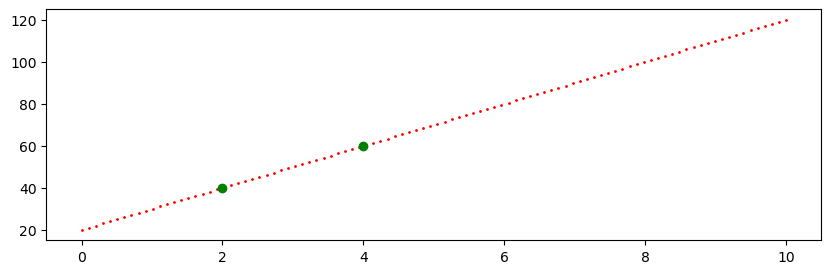

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x_, h, c='r',s=1)
plt.scatter(x,y,c='g')
plt.show()

In [16]:
np.linalg.solve(X, Y)

array([[10.],
       [20.]])

## 6.2 선형연립방정식 풀기 (단변량 회귀분석): 독립변수 1, 데이터 n개

In [17]:
x = np.array([32, 64, 96, 118, 126, 144, 152.5, 158]) #독립변수
y = np.array([18, 24, 61.5, 49, 52, 105,130.3, 125]) # 타겟변수 (종속변수)

In [30]:
X = np.c_[x,np.ones(len(x))]
Y = y.reshape(-1, 1)
X,Y

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 array([[ 18. ],
        [ 24. ],
        [ 61.5],
        [ 49. ],
        [ 52. ],
        [105. ],
        [130.3],
        [125. ]]))

In [31]:
#X @ wb = Y
#X.T @ X @ wb = X.T @ Y
#X.T @ X : 정방행렬
# (X.T @ X) 의 역행렬 @ X.T @X @ wb = (X.T @ X)의 역행렬 @ X.T @ Y

# wb = (X.T @ X)의 역행렬 @ X.T @ Y

wb = np.linalg.inv(X.T @ X) @ X.T @ Y
wb

array([[  0.87493126],
       [-26.79078617]])

In [32]:
np.linalg.solve(X.T @ X, X.T @ Y)

array([[  0.87493126],
       [-26.79078617]])

In [33]:
print('독립변수 x : ', x)
print('실제값 y : ',y)
h = wb[0]*x + wb[1]
print('예측값 h : ', h)

독립변수 x :  [ 32.   64.   96.  118.  126.  144.  152.5 158. ]
실제값 y :  [ 18.   24.   61.5  49.   52.  105.  130.3 125. ]
예측값 h :  [  1.20701424  29.20481464  57.20261504  76.45110282  83.45055292
  99.19931565 106.63623138 111.44835332]


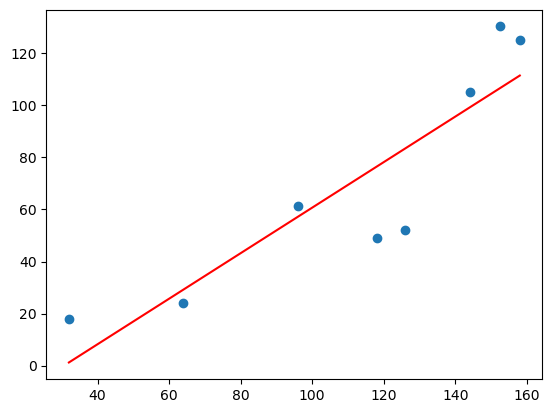

In [34]:
plt.plot(x, h, c = 'r') #선그래프
plt.scatter(x,y) #점그래프
plt.show()

# 연습문제 (실습형)

In [35]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data # 독립변수
iris_data.shape #독립변수 4개, 데이터 갯수는 150개
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [113]:
#실습형 1. 각 변수별 병균 (열별 평균) mean 함수?
m = np.mean(iris_data,axis=0)
m

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [131]:
#실습형 2. 처음 5개 행 출력
iris_data[:5] #iris_data[:5,], iris_data[:5,:] iris_data[:5,...]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [132]:
#실습형 3.처음 5개 행에서 마지막 열 제외한 나머지열 출력
ex3 = np.hsplit(iris_data[:5], [-1])[0] # 메일 받은 내용 
ex3 = iris_data[:5, :-1]
ex3

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [133]:
#실습형 4. 처음 5개 행에서 마지막열만 출력
ex4 = np.hsplit(iris_data[:5], [-1])[-1] # 메일 받은 내용 (2차원)
ex4 = iris_data[:5,-1] # iris_data[:5,-1:]과 다름
ex4 # 1차원

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [137]:
#실습형 5. 3,4번 배열을 원래 모양이 되도록 합치기

answer1 = np.c_[ex3, ex4]
answer2 = np.column_stack((ex3, ex4))
answer3 = np.hstack((ex3, ex4[:, np.newaxis]))
answer4 = np.hstack( (ex3, ex4.reshape(-1,1)))
answer5 = np.hstack( (ex3, np.expand_dims(ex4, axis=1)))
answer6 = np.concatenate( (ex3, ex4.reshape(-1, 1)), axis=1)
np.all(answer1==answer2) # 모든 행, 모든 열이 같은지 여부
answers = [answer1, answer2, answer3, answer4, answer5, answer6]
all([np.all(answer1==answer) for answer in answers])

True

In [139]:
def same_all(*answers):
    if len(answers)>0:
        first = answers[0]
        return all([np.all(first==answer) for answer in answers])
    else:
        return False
same_all(answer1, answer2, answer3, answer4, answer5, answer6)

True

In [140]:
same_all(*answers)

True

In [146]:
# 실습형 6. 첫 5개 행을 이용해서 각 열별로 평균보다 큰 값들만 출력
iris_sample = iris_data[:5]
print('data :\n', iris_sample,'\n')

col_avg = np.mean(iris_sample, axis=0)

iris_sample > col_avg

data :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 



array([[ True,  True, False, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [148]:
x = iris_sample.copy()
x[x<= col_avg] =np.nan
x

array([[5.1, 3.5, nan, nan],
       [4.9, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, 1.5, nan],
       [5. , 3.6, nan, nan]])

# 연습문제 (문제풀이형)

In [ ]:
1. 3
2. 3,4
3. 1
4. 1
5. 2